# Plotting with Plotly

For the second round of interviews, REMAX is requesting that applicants create interactive plots using Plotly Express instead of hvPlot. Create two scatter plots using the provided foreclosure data.

In [1]:
import plotly.express as px
import pandas as pd
from pathlib import Path

## Plot Foreclosures

In [5]:
# Read in data
foreclosures = pd.read_csv('allegheny_foreclosures.csv',
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
)

# Slice data and group
foreclosures_grp = (
    foreclosures[["municipality", "amount"]]
    .groupby([foreclosures.index.year, "municipality"])
    .count()
    .reset_index()
)
foreclosures_grp.head()

,filing_date,municipality,amount
0,2009,Aleppo Township,5
1,2009,Aspinwall Boro,4
2,2009,Avalon Boro,22
3,2009,Baldwin Boro,47
4,2009,Baldwin Township,11


### Plot relationship between municipality and the number of foreclosures

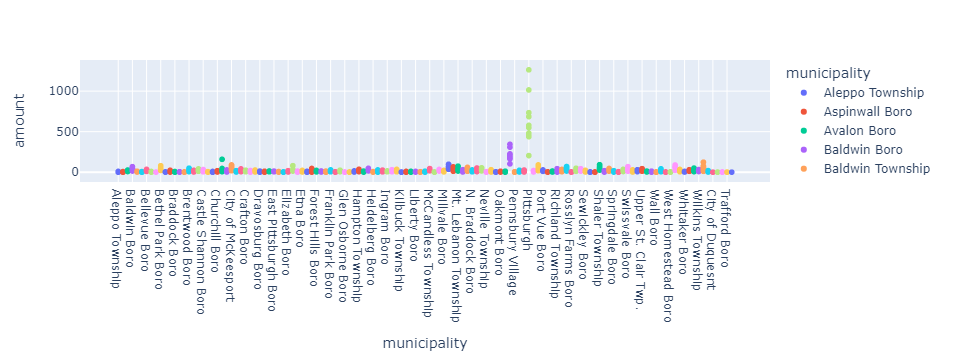

In [11]:
# Create scatter plot
px.scatter(
    foreclosures_grp,
    x="municipality",
    y="amount",
    color="municipality",
)

### Plot the relationship between filing date and municipality

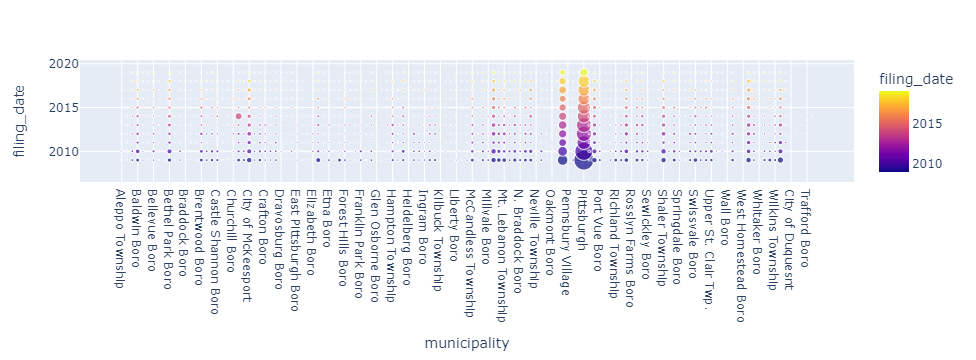

In [15]:
# Create scatter plot
px.scatter(
    foreclosures_grp,
    x="municipality",
    y="filing_date",
    color="filing_date",
    size='amount'
)

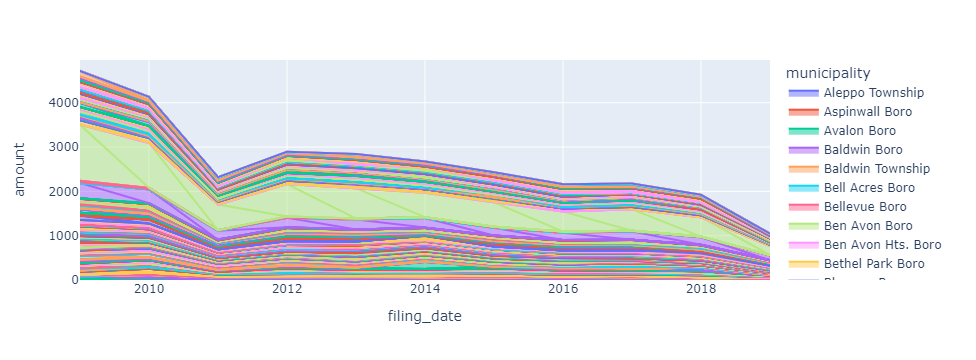

In [17]:
px.area(
    foreclosures_grp,
    x="filing_date",
    y="amount",
    color="municipality",
    line_group='amount'
)